# 신경망

퍼셉트론 수식 나타내기
y -> 0 (b + w1x1 + w2x2 <= 0)
  -> 1 (b + w1x1 + w2x2 > 0)

-------------------------------
y= h(b + w1x1 + w2x2)

h(x) = 0 (x<= 0)
       1 (x>0)

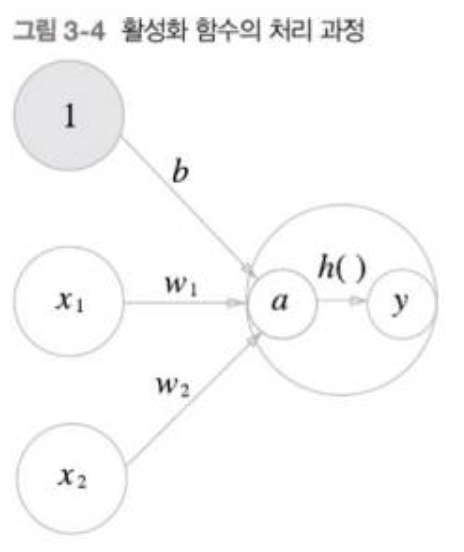

### 계단 함수 구현하기

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
# 인수 x는 실수(부동소수점)만 받아들인다. , numpy 배열을 인수로 넣을 수 없다.

In [2]:
import numpy as np

def step_function(x):
    y = x >0
    return y.astype(np.int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x>0
y

array([False,  True,  True])

In [5]:
y = x>0
y = y.astype(np.int32) #numpy 배열의 자료형을 변환할 때 사용하는 메서드
y

array([0, 1, 1], dtype=int32)

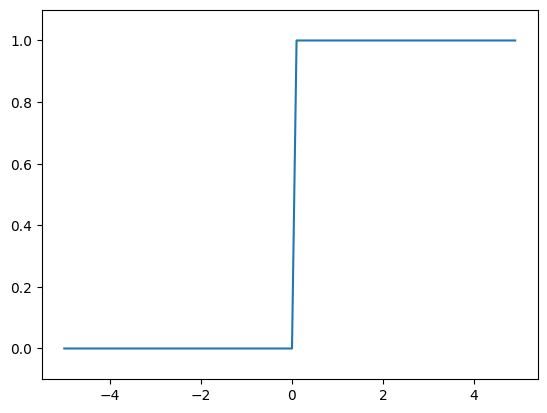

In [2]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1간격 만큼 만들어 내는 것 
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 시그모이드 함수

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# 인수가 -x가 아니라 x여도 올바른 결과가 나온다.

In [25]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [26]:
# 브로드캐스트의 원리
t = np.array([1.0, 2.0, 3.0])
1.0 + t
# 1.0하나 이지만 브로드캐스트로 인해서 1행3열의 행렬로 해서 더해진다.

array([2., 3., 4.])

In [27]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

In [28]:
# 시그모이드 함수
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y 축 범위 지정
plt.show()

NameError: name 'plt' is not defined

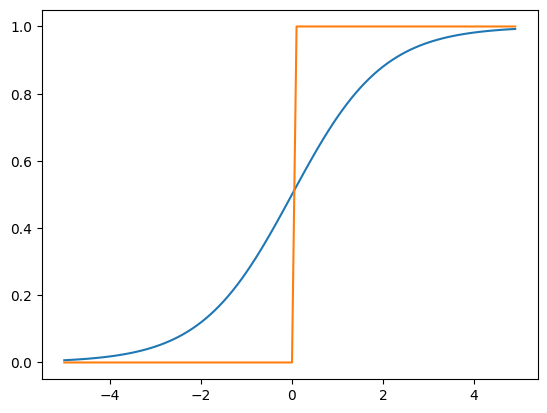

In [15]:
x1 = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x)
plt.plot(x1,y1)
x2 = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1간격 만큼 만들어 내는 것 
y2 = step_function(x)
plt.plot(x2,y2)
plt.show()

시그모이드는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.
계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버리게 된다.
시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역활을 하게 된다.

어떠한 역치마다 더 세밀한 그 값을 볼 수 있는 것이 시그모이드 이고 계단 함수의 경우에 어떠한 경계를 기준으로 값이 급격하게 바뀌기 때문에 이분법을 할 때에 유용하게 사용이 될 것 같다.


이 2개의 함수는 선형 함수이다. 선형 함수는 일차독립들의 모임인 함수로써 출력이 입력의 상수배만큼 변하는 함수이기 때문이다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.
Why? 선형함수를 사용하면 안될까?
선형 함수 이용 --> 신경망의 층을 깊게 하는 의미가 없어지기 때문.
선형 함수의 문제의 경우에 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.
 여러층 구성의 이점을 살릴 수가 없다.
 h(x) = cx
 y(x) = h(h(h(x))) 이면 y(x) = c*c*c*x ---> y(x) = ax ---> a=c^3

### 비선형 함수(ReLU 함수)

In [ ]:
#즉, 직선 1개로는 그릴 수 없는 함수를 이야기 한다.
#ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력, 0이하면 0을 출력하는 함수이다.

In [17]:
def relu(x):
    return np.maximum(0,x)
#maximum -> 0과 x의 값 중에 더 큰 값을 사용하는 것이다.

## 다차원 배열의 계산

### 3.3.1 다차원 배열

In [18]:
#숫자의 집합
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [19]:
np.ndim(A)

1

In [20]:
A.shape

(4,)

In [22]:
A.shape[0]

4

In [ ]:
B = np.array([[1,2],[3,4],[5,6]]) #2차원 배열은 행렬이라고 한다.
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [25]:
np.ndim(B)

2

In [27]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [3]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [4]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [5]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [6]:
len(A)

2

In [7]:
result = [] #곱으로 나오는 리스트

for i in range(len(A)): #A의 행 수만큼 반복
    row = []
    for j in range(len(B[0])): #B의 열 수만큼 0을 넣기
        row.append(0)
    result.append(row)

In [8]:
result

[[0, 0], [0, 0]]

In [14]:
result1 = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

In [15]:
result1

[[0, 0], [0, 0]]

In [16]:
for i in range(len(A)): #A의 행
    for j in range(len(B[0])): #B의 열
        for k in range(len(A[0])):
            result1[i][j] += A[i][k] * B[k][j]

In [17]:
result1

[[np.int64(19), np.int64(22)], [np.int64(43), np.int64(50)]]

In [2]:
import numpy as np

In [4]:
# other example
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [5]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [6]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [7]:
# other example
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [8]:
A.shape

(2, 3)

In [10]:
np.dot(A,C) #error : A의 1번째 차원과 C의 0번째 차원의 원소가 다르다. 각각, 3과 2로.

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [11]:
# 행렬의 곱에서는 대응하는 차원의 우너소 수를 일치시켜라

A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [13]:
B = np.array([7,8])
B.shape

(2,)

In [14]:
np.dot(A,B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱
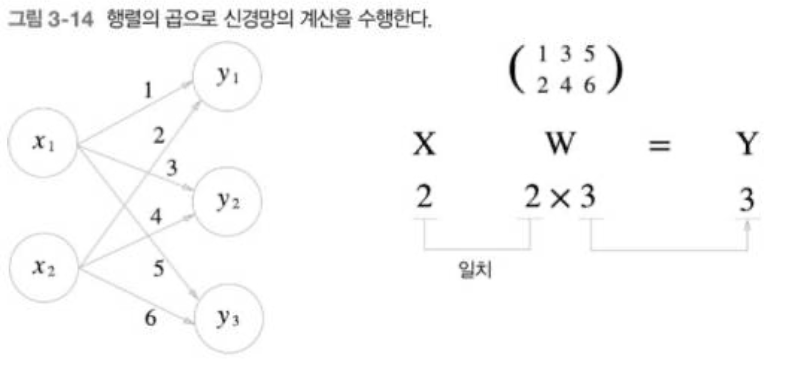

In [15]:
X = np.array([1,2])
X.shape

(2,)

In [16]:
W = np.array([[1,3,5],[2,4,6]])
W.shape

(2, 3)

In [18]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


### 3.4 3층 신경망 구현하기
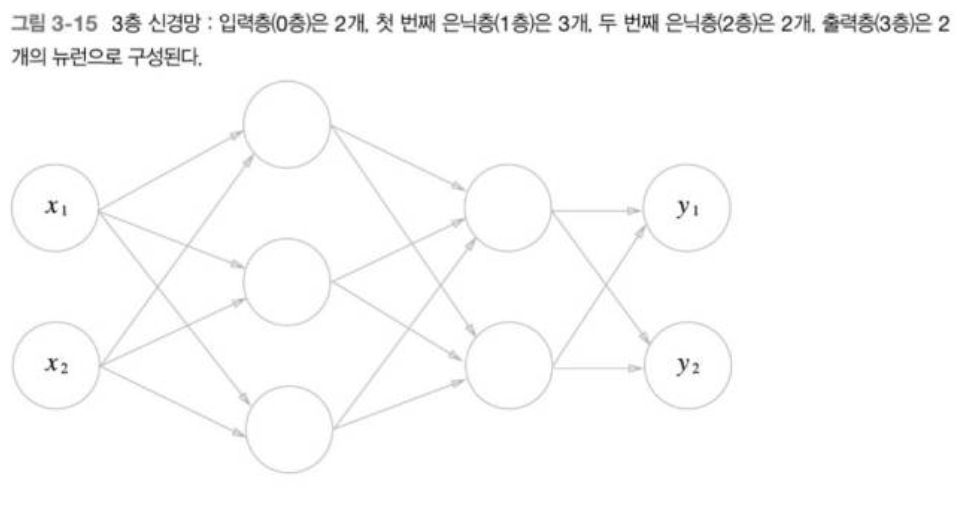

#### 3.4.1 표기법 설명
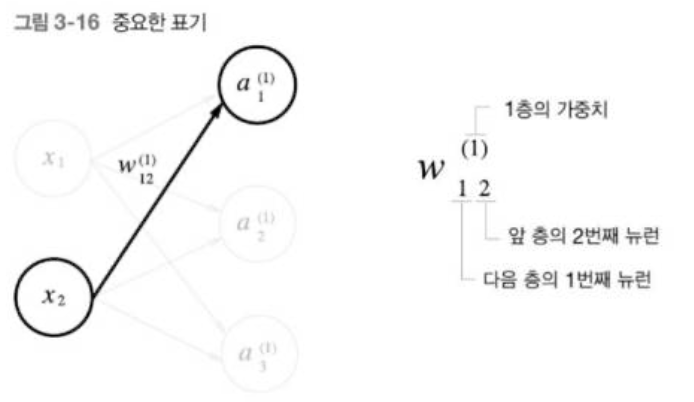

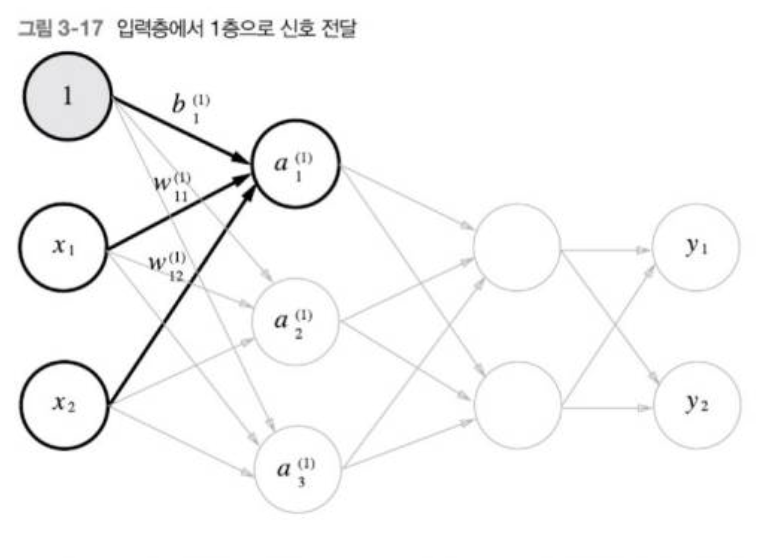

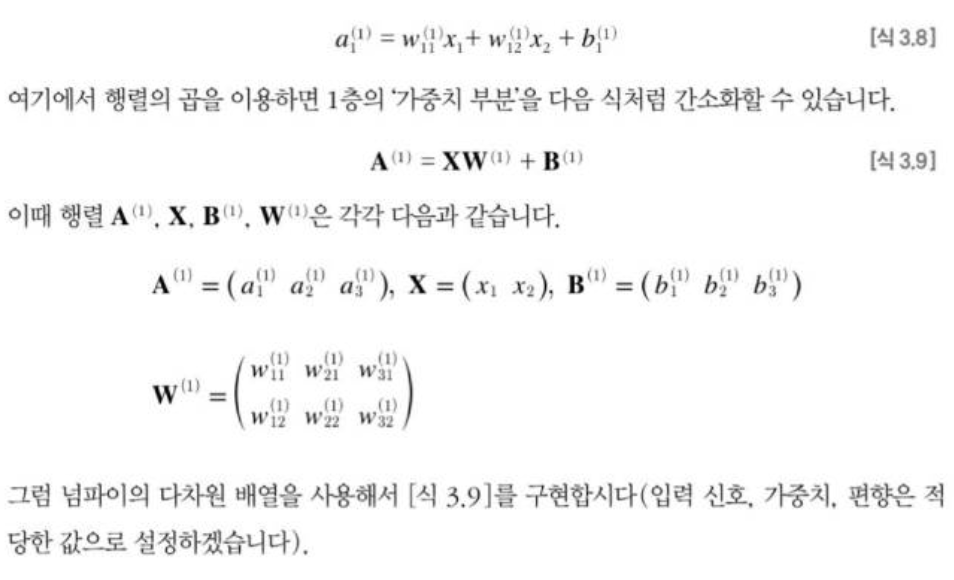

In [29]:
#3.4.2 각 층의 신호 전달 구현하기
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1
print(A1)

Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


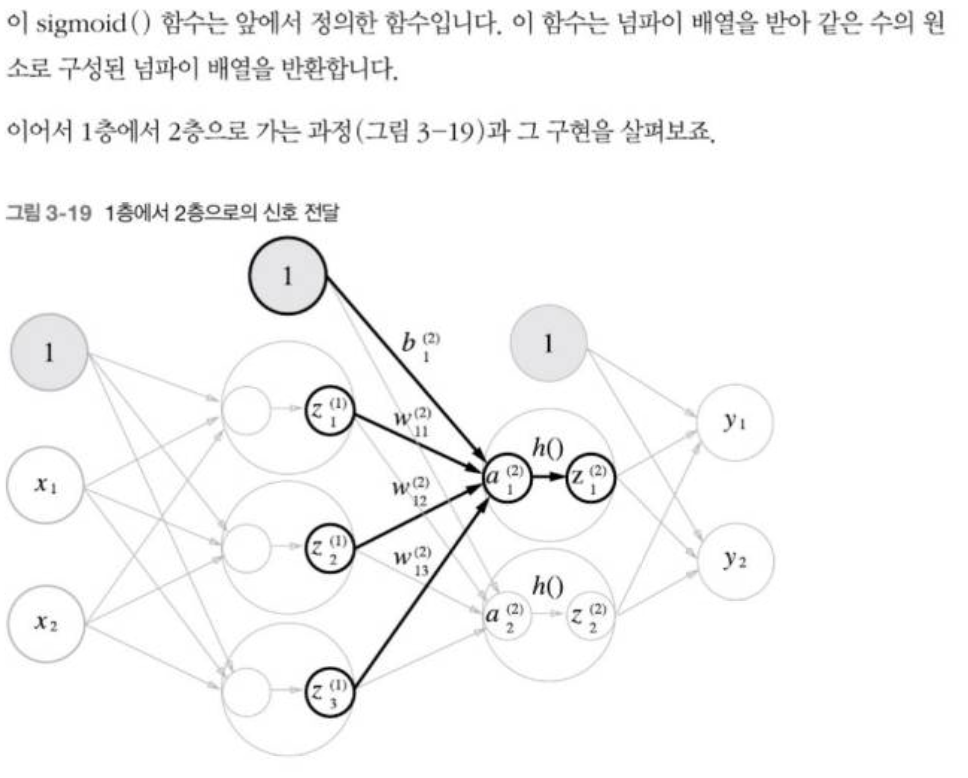

In [32]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


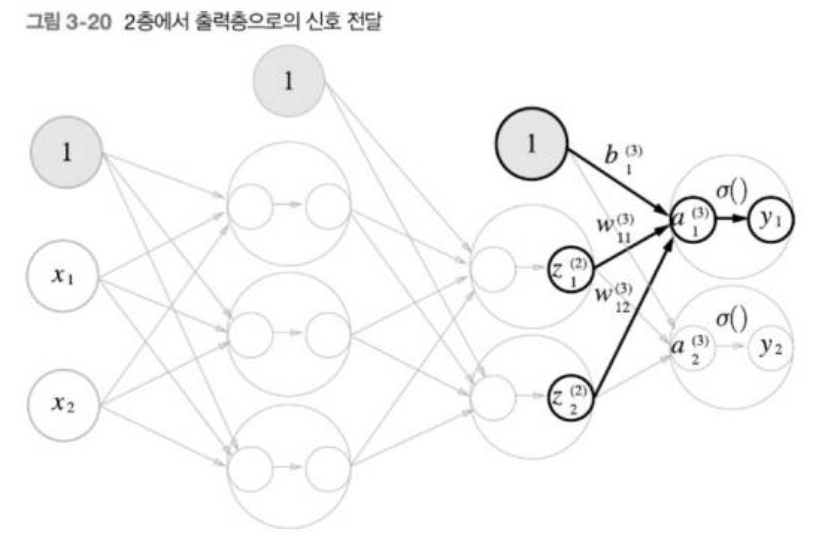

In [33]:
def identity_funtion(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_funtion(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [34]:
# 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적

In [35]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

In [39]:
def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_funtion(a3)

    return y

#forward -> 순방향(입력 -  출력), 순전파
#backward -> 역방향(출력 - 입력), 역전파

In [40]:
network = init_network()
x = np.array([0.1,0.5])
y = forward(network, x)
print(y)

[0.31234736 0.6863161 ]


In [ ]:
# 기계학습 -> 데이터가 어느 클래스(class)에 속하느냐는 분류
# 입력 데이터에서 연속적인 수치를 예측하는 문제는 회귀

# 항등함수는 입력 신호가 그대로 출력 신호가 되는 걸 이야기 한다.

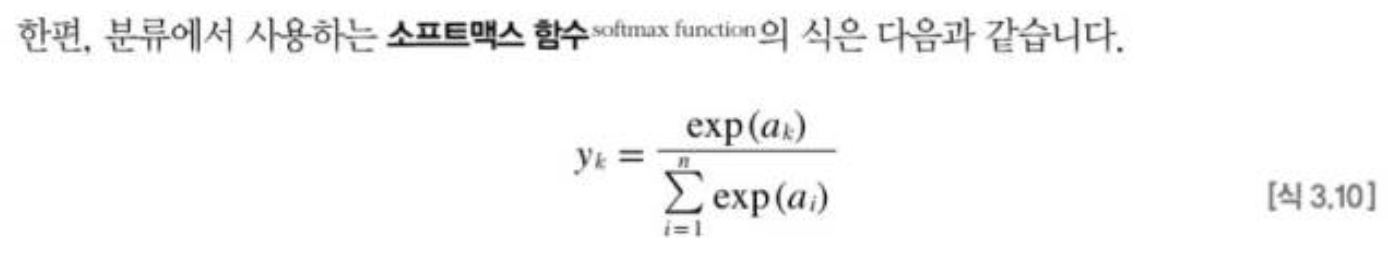

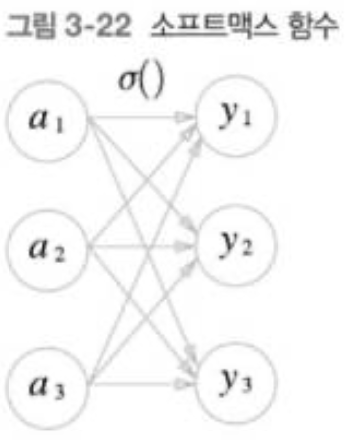

In [41]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) #지수함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [42]:
sum_exp_a = np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [43]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [44]:
#소프트맥스 함수
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
## 오버플로우(overflow) -> 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없음.

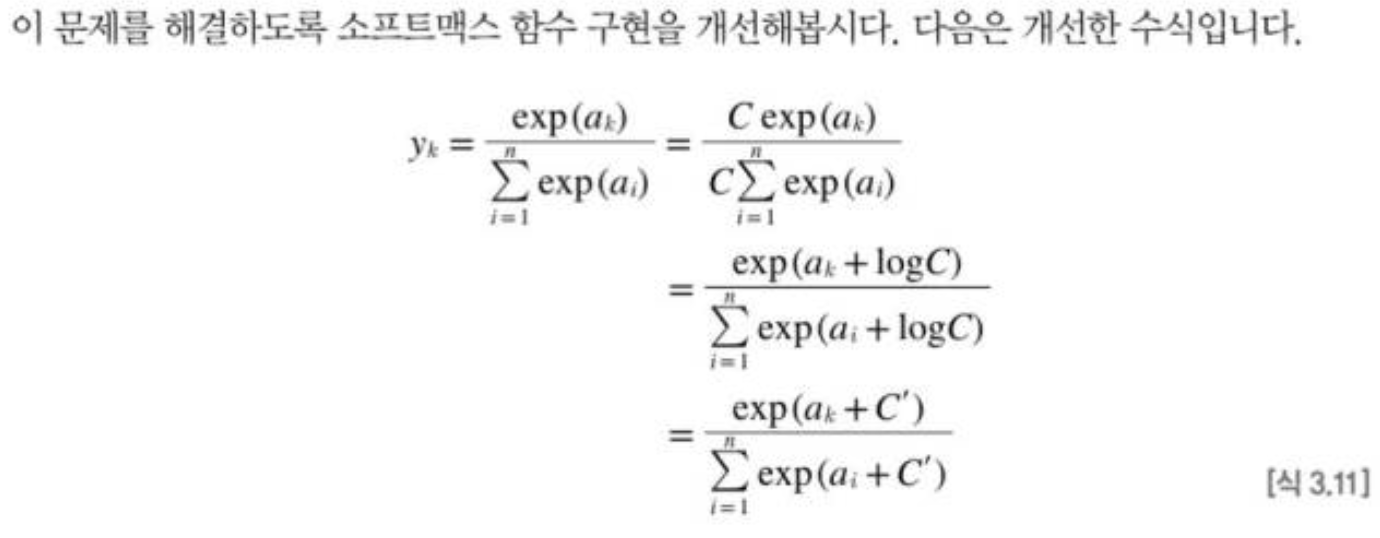

In [45]:
#overflow의 예시
a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산
#제대로 계산이 되지 않는다.

/var/folders/1q/knkfc3fn1sb4kgg3b8kr21fc0000gn/T/ipykernel_2821/2032456227.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산
/var/folders/1q/knkfc3fn1sb4kgg3b8kr21fc0000gn/T/ipykernel_2821/2032456227.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산


array([nan, nan, nan])

In [46]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [47]:
np.exp(a - c) / np.sum(np.exp(a - c))

# nan(not a number)의 오류를 입력 신호 중 최댓값을 빼주면 올바르게 계산 할 수 있다.

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [54]:
# 바꾼 softmax 함수 재정의 (overflow 대책)
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [58]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y)) #소프트맥스 함수의 출력은 0에서 1.0 사이의 실수입니다. 소프트맥스 함수 출력의 총합은 1입니다.
# 그래서 소프트맥스의 함수 출력을 '확률'로 해석가능하다.

[0.01821127 0.24519181 0.73659691]
1.0


### MNIST 이미지 데이터셋을 이용함

In [62]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

ModuleNotFoundError: No module named 'dataset.mnist'